In [416]:
import numpy as np
import matplotlib.pyplot as plt

In [417]:
def cos_func(x):
    f_1 = 50
    f_2 = 150
    f_3 = 450
    w_1 = 2 * np.pi * f_1
    w_2 = 2 * np.pi * f_2
    w_3 = 2 * np.pi * f_3
    return np.cos(w_1 * x) + np.cos(w_2 * x) + np.cos(w_3 * x)

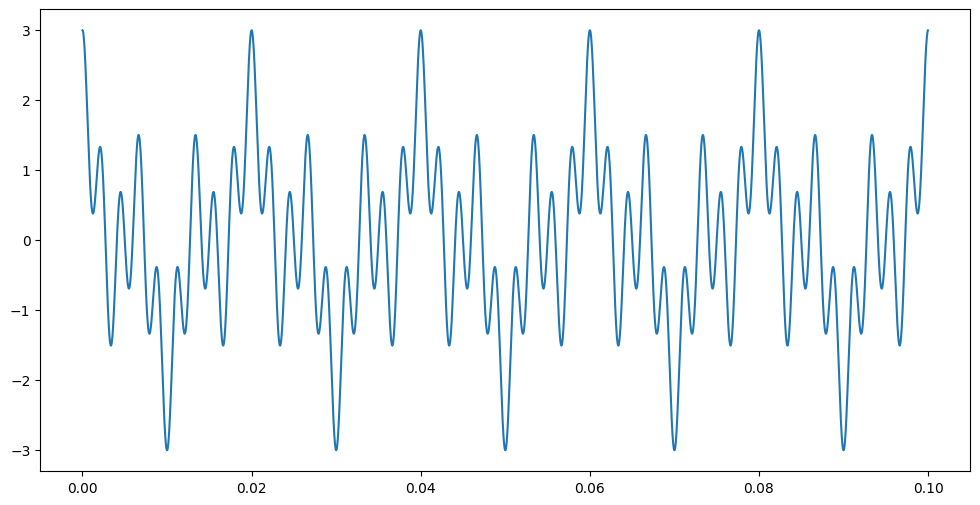

In [418]:
cos_args = np.arange(0, 0.1, 1 / 50000)
y_cos = cos_func(cos_args)

plt.figure(figsize=(12, 6))
plt.plot(cos_args, y_cos)
plt.show()

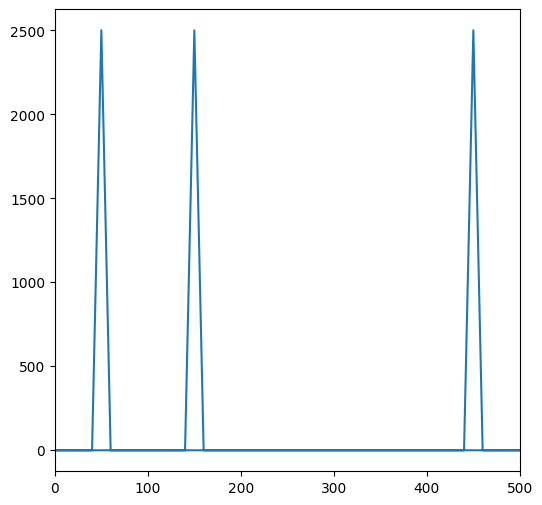

In [453]:
x_cos_fft = np.fft.fftfreq(len(cos_args), 0.1 / len(cos_args))
y_cos_fft = np.fft.fft(y_cos)

plt.figure(figsize=(6, 6))
plt.plot(x_cos_fft, np.abs(y_cos_fft))
plt.xlim([0, 500])
plt.show()

In [420]:
def butter_filter(w):
    return 1 / (w ** 2 + 1j * np.sqrt(2) * w + 1)

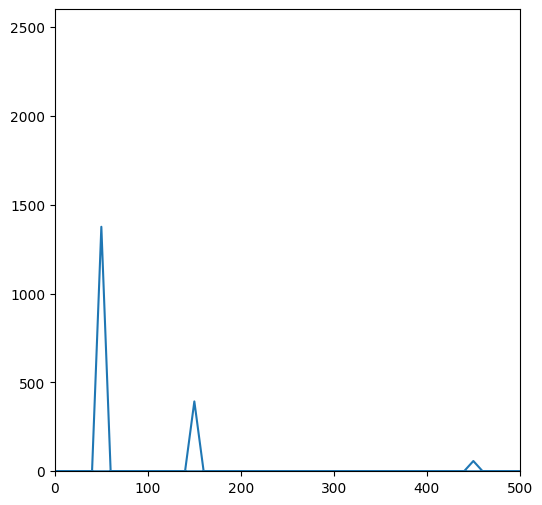

In [454]:
low_filtered_y_cos_fft = butter_filter(x_cos_fft / 70) * y_cos_fft

plt.figure(figsize=(6, 6))
plt.plot(x_cos_fft, np.abs(low_filtered_y_cos_fft))
plt.ylim([-0.05, 2600])
plt.xlim([0, 500])
plt.show()

c:\Users\ZhukZzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ZhukZzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


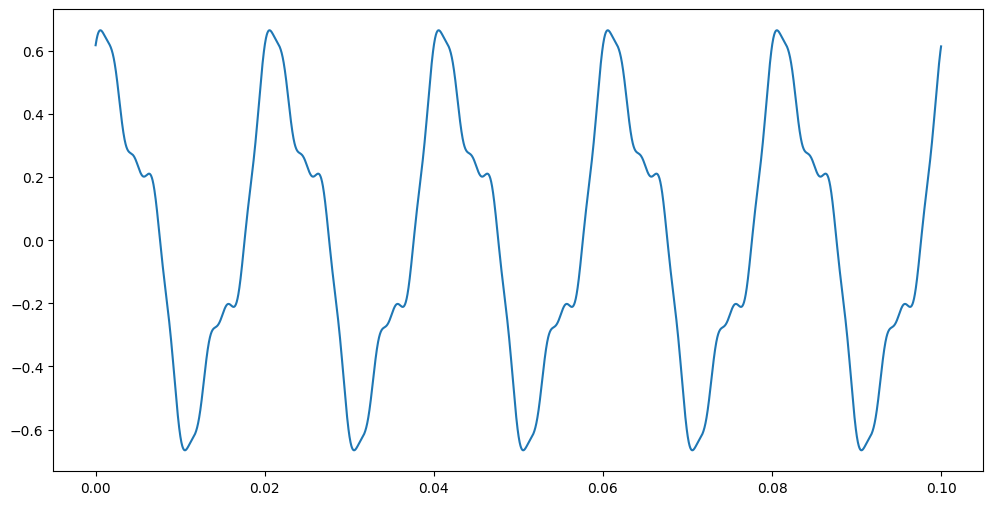

In [452]:
y_cos_from_ifft = np.fft.ifft(low_filtered_y_cos_fft)

plt.figure(figsize=(12, 6))
plt.plot(cos_args, y_cos_from_ifft)
plt.show()